# Exploratory Analysis Notebook

The script contains seaborn data visualizations for extract informations from the created features.

Table of Content: 
* **1. Import required packages**
* **2. Import files**
* **3. Exploratory Analysis**
* 3.1 Count of collected Covid articles by sources
* 3.2 Count of collected Covid articles by type
* 3.3 Distribution of title word count in the document title
* 3.4 Distribution of title exclamination sign count in the document title
* 3.5 Distribution of title exclamination sign count in the document title
* 3.6 Distribution of title question sign count in the document title
* 3.7 Distribution of title upper words count in the document title
* 3.8 Distribution of title upper words count in the document title
* 3.9 Distribution of numerical elements in the document text
* 3.10 Distribution of title noun type words count in the document title
* 3.11 Distribution of title verb type words count in the document title
* 3.12 Distribution of title adj type words count in the document title
* 3.13 Distribution of title polarity
* 3.14 Distribution of text polarity
* **4. Top Named Entities**
* 4.1 Top Persons in all document title
* 4.2 Top Persons in desonformation document title
* 4.3 Top Persons in mainstream document title
* 4.4 Top Locations in all document title
* 4.5 Top Locations in dezinformational document title
* 4.6 Top Locations in mainstream document title

### 1. Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
# seaborn options
plt.figure(figsize=(15,8))

sns.set(style="whitegrid")

<Figure size 1080x576 with 0 Axes>

### 2. Import files

In [4]:
abt_covid = pd.read_pickle('C:/Users/molna/Desktop/Szakdolgozat/adatok/abt_covid_featured.pkl')

print("ABT table has {} rows and {} columns".format(len(abt_covid), len(abt_covid.columns)))

ABT table has 63633 rows and 50 columns


In [5]:
abt_covid.head(2)

,title,date,text,source,dezinf,title_word_cnt,title_avg_word,title_exclam_num,title_ques_num,title_stop_cnt,...,title_ner_pers,title_ner_orgs,title_ner_locs,text_ner_pers,text_ner_orgs,text_ner_locs,title_senti_list,title_polarity,text_senti_list,text_polarity
"""56""",4000 szexstreamer adatai kerültek nyilvánosságra,2020-01-21,A vpnMentor biztonságtechnikai kutatói 875 ezer teljesen levédetlen és titkosítatlan fájlt talá...,index.hu,0,5,8.800,0,0,0,...,[],[],[],[],"[Softpedia News., ImLive, Fotó: Shutterstock Ázsiai, Nemzetbiztonsági Szakszolgálattól]","[Amazon-szerveren, ImLive-nak]","[0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0
"""70""",Ukrán állampolgárok adatai szivárogtak ki egy állami weboldalról,2020-01-21,Újabb kiberbiztonsági probléma Ukrajnában: a nemzetbiztonsági és védelmi minisztérium elismerte...,index.hu,0,8,7.125,0,0,2,...,[],[],[],"[Zelenszkij, Akták Kiberbiztonság]","[Reuters., FBI, Burisma, Nemzetbiztonsági Szakszolgálattól]","[Ukrajnában, Ukrajnából, Kijev]","[0, 0, 0, 0, 0, 0]",0.0,"[0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.0


### 3. Exploratory Analysis

### 3.1 Count of collected Covid articles by sources

In [42]:
df_count_source = abt_covid.groupby(['source'])['text'].count().reset_index().sort_values(by=["text"])

In [55]:
plot_order = abt_covid.groupby(['source'])['text'].count().sort_values(ascending=False).index.values

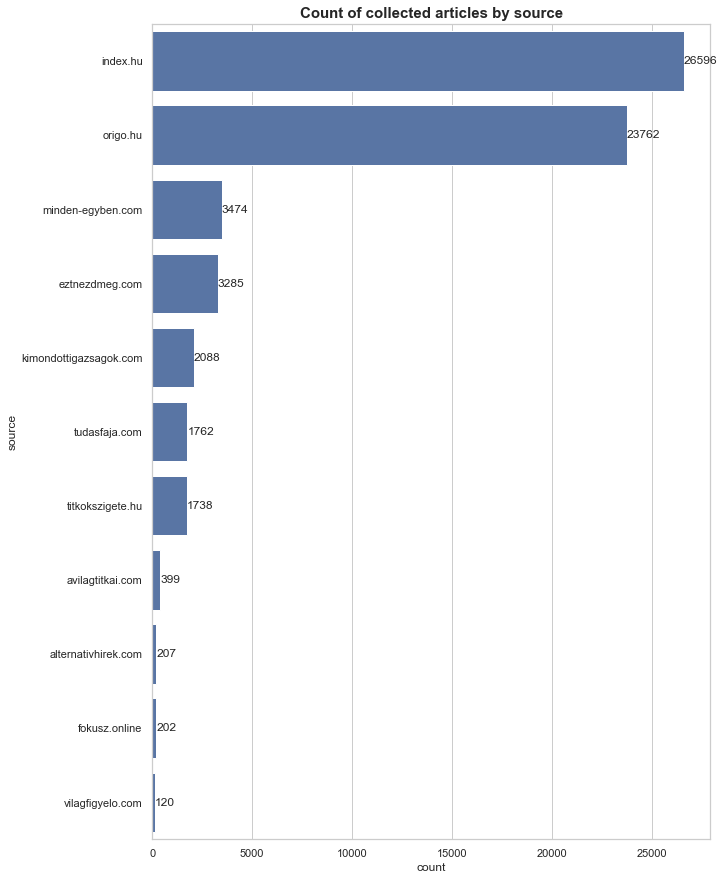

In [54]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="text", y="source", data=df_count_source,
            label="sources", color="b", order=plot_order)

plt.title('Count of collected articles by source', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('source', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 3.2 Count of collected Covid articles by type
(dezinformation vs mainstream)

In [58]:
df_count_dezinf = abt_covid.groupby(['dezinf'])['text'].count().reset_index().sort_values(by=["text"])

In [65]:
df_count_dezinf["dezinf"].replace([1, 0], ["desinform", "mainstream"], inplace=True)

In [67]:
plot_order = df_count_dezinf.groupby(['dezinf'])['text'].count().sort_values(ascending=False).index.values

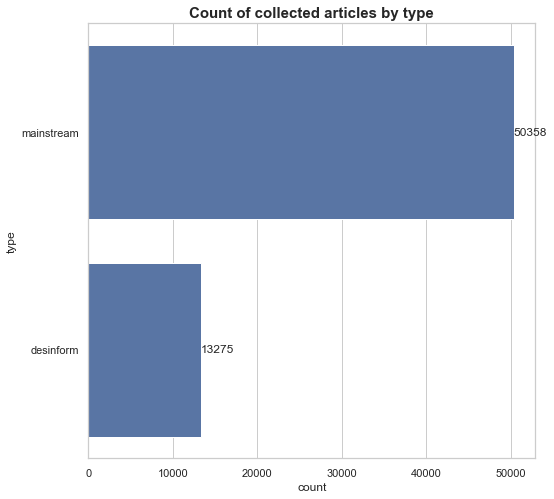

In [76]:
f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x="text", y="dezinf", data=df_count_dezinf,
            label="sources", color="b", order=plot_order)

plt.title('Count of collected articles by type', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('type', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 3.3 Distribution of title word count in the document title
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

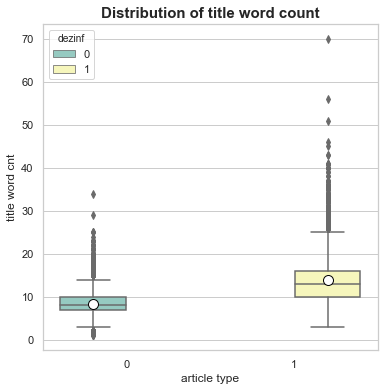

In [42]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_word_cnt",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title word count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.4 Distribution of title exclamination sign count in the document title
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

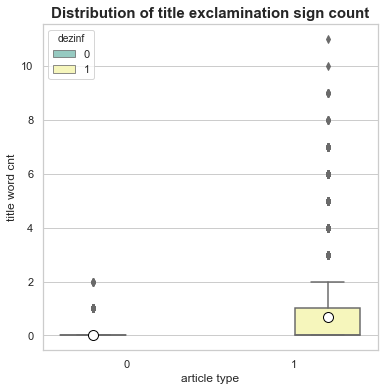

In [26]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_exclam_num",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title exclamination sign count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

In [27]:
abt_covid[abt_covid['title_exclam_num'] == abt_covid['title_exclam_num'].max()]['title']

"1200"    FONTOS!!! TUDJON RÓLA! VESZÉLY!!!! Tombol a járvány : olyanok is elkapták a betegséget, akik be ...
Name: title, dtype: object

### 3.5 Distribution of title exclamination sign count in the document title¶
(dezinformation sources)

Text(0, 0.5, 'title word cnt')

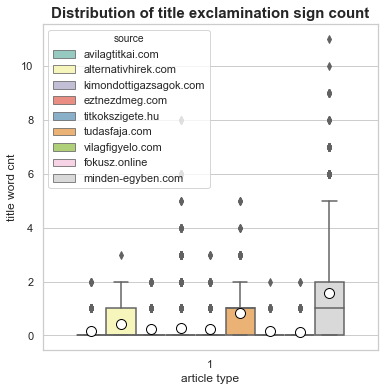

In [25]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_exclam_num",
                 hue='source',
                 data=abt_covid[(abt_covid['source'] != 'origo.hu')
                               & (abt_covid['source'] != 'index.hu')],
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title exclamination sign count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.6 Distribution of title question sign count in the document title¶
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

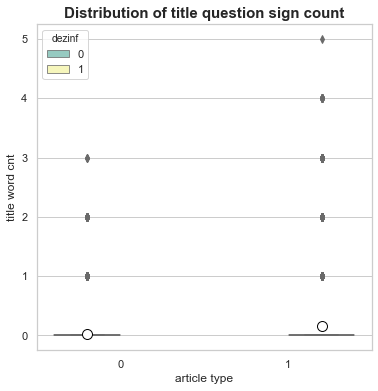

In [9]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_ques_num",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

#plt.grid()  #just add this
plt.title('Distribution of title question sign count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.7 Distribution of title upper words count in the document title¶
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

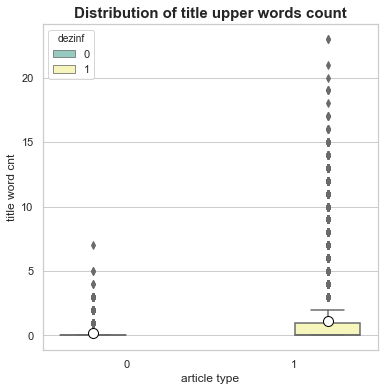

In [28]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_cnt_upper",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

#plt.grid()  #just add this
plt.title('Distribution of title upper words count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

In [18]:
abt_covid[abt_covid['title_cnt_upper'] == abt_covid['title_cnt_upper'].max()]['title']

"992"     ITT A ROSSZ HÍR! Koronavírus – ezekben a magyar városokban TAROLHAT NAGYON DURVÁN A KÖVETKEZŐ HE...
"2387"    Ma reggel jelentették be ,sok az új fertőzött és a halott !ITT A ROSSZ HÍR! Koronavírus – ezekbe...
Name: title, dtype: object

### 3.8 Distribution of title upper words count in the document title¶
(dezinformation)

Text(0, 0.5, 'title word cnt')

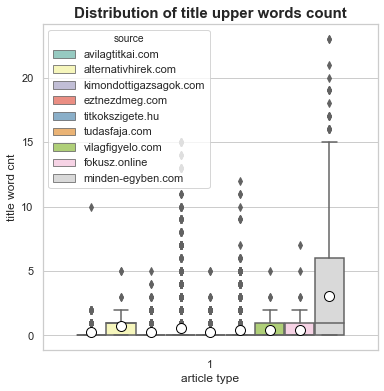

In [29]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_cnt_upper",
                 hue='source',
                 data=abt_covid[(abt_covid['source'] != 'origo.hu')
                               & (abt_covid['source'] != 'index.hu')],
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

#plt.grid()  #just add this
plt.title('Distribution of title upper words count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.9 Distribution of numerical elements in the document text¶
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

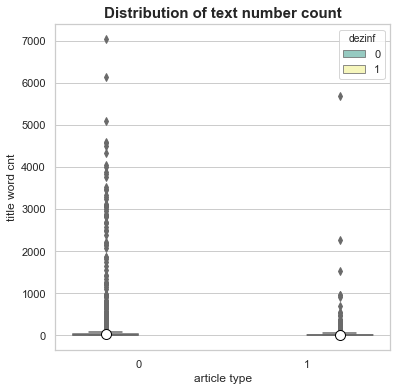

In [30]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="text_cnt_num",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

#plt.grid()  #just add this
plt.title('Distribution of text number count', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.10 Distribution of title noun type words count in the document title
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

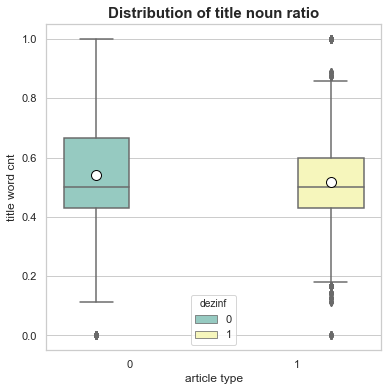

In [31]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_noun_ratio",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title noun ratio', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.11 Distribution of title verb type words count in the document title
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

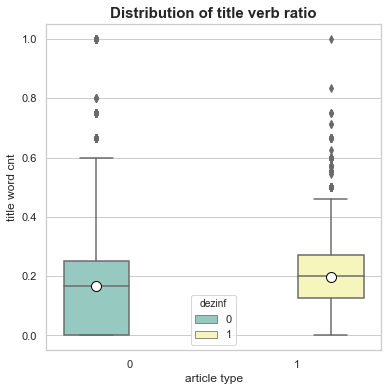

In [32]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_verb_ratio",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title verb ratio', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.12 Distribution of title adj type words count in the document title¶
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

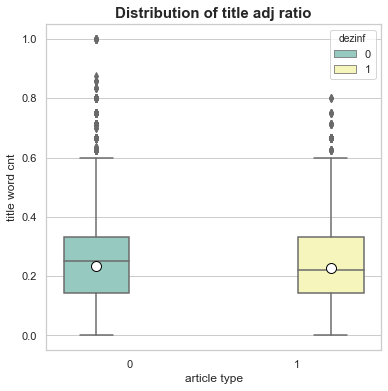

In [33]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_adj_ratio",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title adj ratio', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.13 Distribution of title polarity 
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

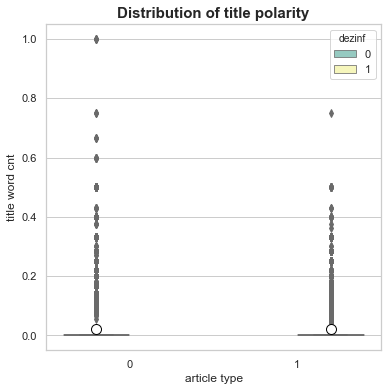

In [34]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_polarity",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title polarity', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

In [ ]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_polarity",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title polarity', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.13 Distribution of title polarity by dezinformational sources


Text(0, 0.5, 'title word cnt')

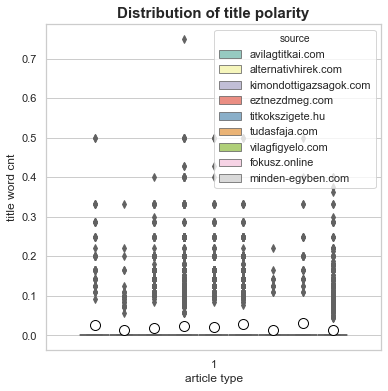

In [36]:
        plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="title_polarity",
                 hue='source',
                 data=abt_covid[(abt_covid['source'] != 'origo.hu')
                               & (abt_covid['source'] != 'index.hu')],
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of title polarity', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 3.14 Distribution of text polarity¶
(dezinformation vs mainstream)

Text(0, 0.5, 'title word cnt')

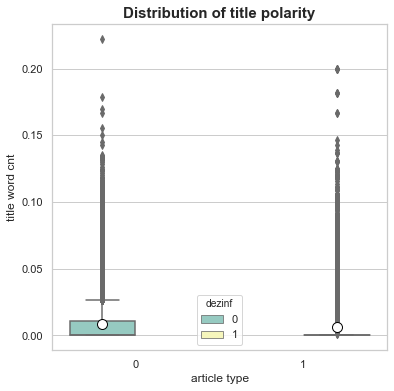

In [35]:
 plt.figure(figsize=(6, 6))

ax = sns.boxplot(x="dezinf", 
                 y="text_polarity",
                 hue='dezinf',
                 data=abt_covid,
                 palette="Set3",
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

plt.title('Distribution of text polarity', fontweight='bold', fontsize=15)
plt.xlabel('article type', fontsize=12)
plt.ylabel('title word cnt', fontsize=12)

### 4. Top Named Entities

### 4.1 Top Persons in all document title

In [14]:
flat_person_list = [item for elem in abt_covid["title_ner_pers"] for item in elem]

In [15]:
per_counts = Counter(flat_person_list).most_common(15)
df_top_pers = pd.DataFrame(per_counts, columns =['person', 'count'])

In [16]:
plot_order = df_top_pers['person'].values

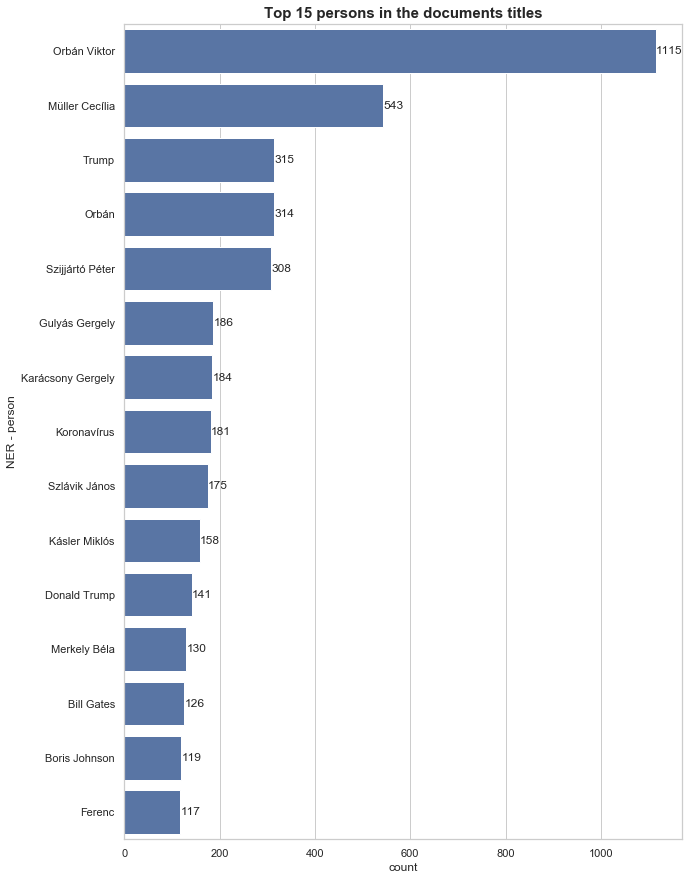

In [17]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="person", data=df_top_pers,
            label="person", color="b", order=plot_order)

plt.title('Top 15 persons in the documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - person', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 4.2 Top Persons in desonformation document title

In [7]:
fake_flat_person_list = [item for elem in abt_covid[abt_covid["dezinf"] == 1]["title_ner_pers"] for item in elem]

In [9]:
fake_per_counts = Counter(fake_flat_person_list).most_common(15)
df_fake_top_pers = pd.DataFrame(fake_per_counts, columns =['person', 'count'])

In [19]:
plot_order = df_fake_top_pers['person'].values

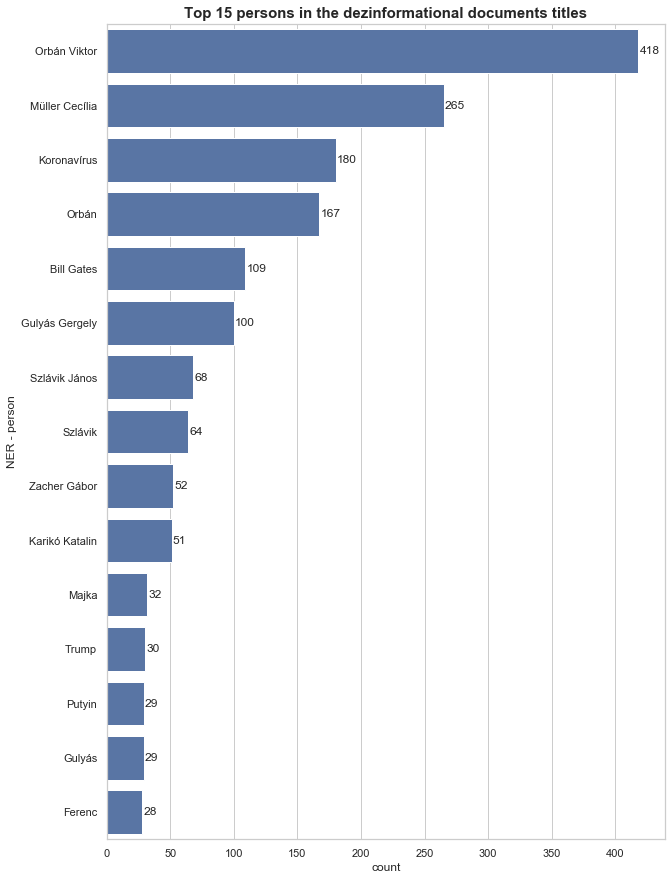

In [21]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="person", data=df_fake_top_pers,
            label="person", color="b", order=plot_order)

plt.title('Top 15 persons in the dezinformational documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - person', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 4.3 Top Persons in mainstream document title

In [22]:
mainsteam_flat_person_list = [item for elem in abt_covid[abt_covid["dezinf"] == 0]["title_ner_pers"] for item in elem]

In [24]:
mainsteam_per_counts = Counter(mainsteam_flat_person_list).most_common(15)
df_mainsteam_top_pers = pd.DataFrame(mainsteam_per_counts, columns =['person', 'count'])

In [26]:
plot_order = df_mainsteam_top_pers['person'].values

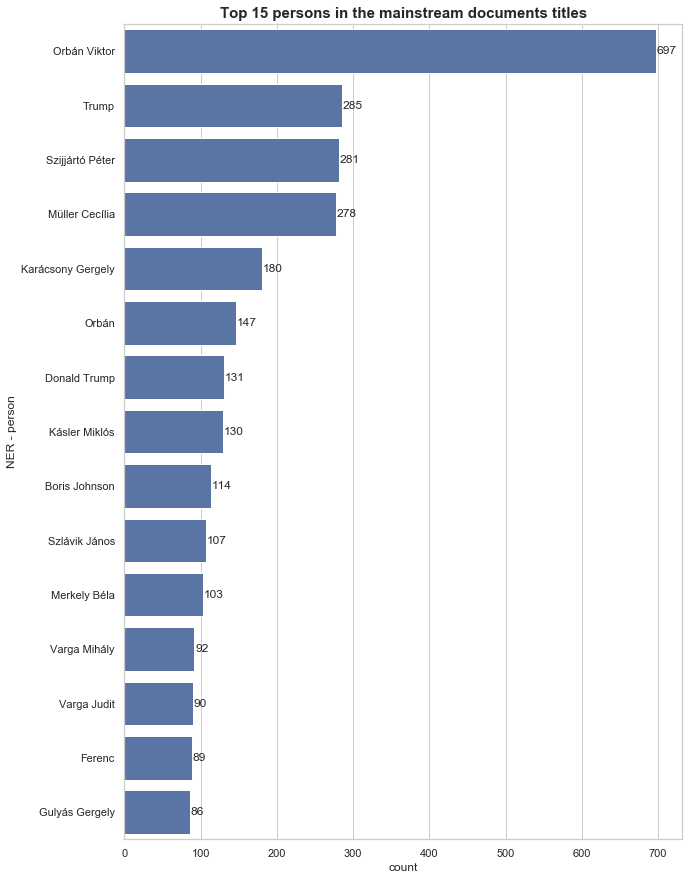

In [28]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="person", data=df_mainsteam_top_pers,
            label="person", color="b", order=plot_order)

plt.title('Top 15 persons in the mainstream documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - person', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 4.4 Top Locations in all document title

In [43]:
flat_location_list = [item for elem in abt_covid["title_ner_locs"] for item in elem]

In [44]:
loc_counts = Counter(flat_location_list).most_common(15)
df_top_locs = pd.DataFrame(loc_counts, columns =['location', 'count'])

In [46]:
plot_order = df_top_locs['location'].values

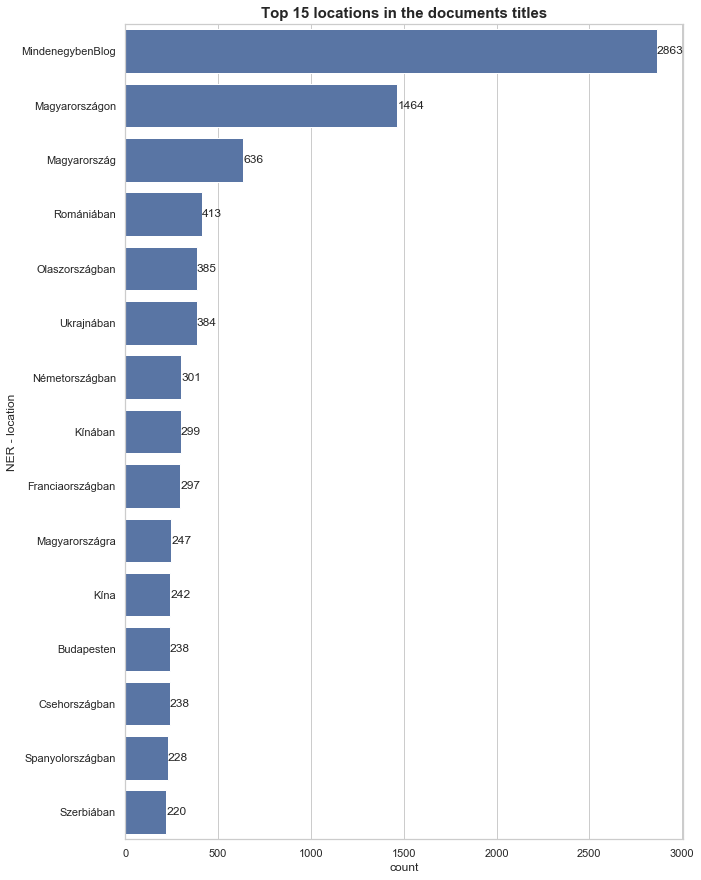

In [49]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="location", data=df_top_locs,
            label="person", color="b", order=plot_order)

plt.title('Top 15 locations in the documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - location', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 4.5 Top Locations in dezinformational document title

In [50]:
fake_flat_location_list = [item for elem in abt_covid[abt_covid["dezinf"] == 1]["title_ner_locs"] for item in elem]

In [53]:
loc_counts = Counter(fake_flat_location_list).most_common(15)
df_dezinf_top_locs = pd.DataFrame(loc_counts, columns =['location', 'count'])

In [54]:
plot_order = df_dezinf_top_locs['location'].values

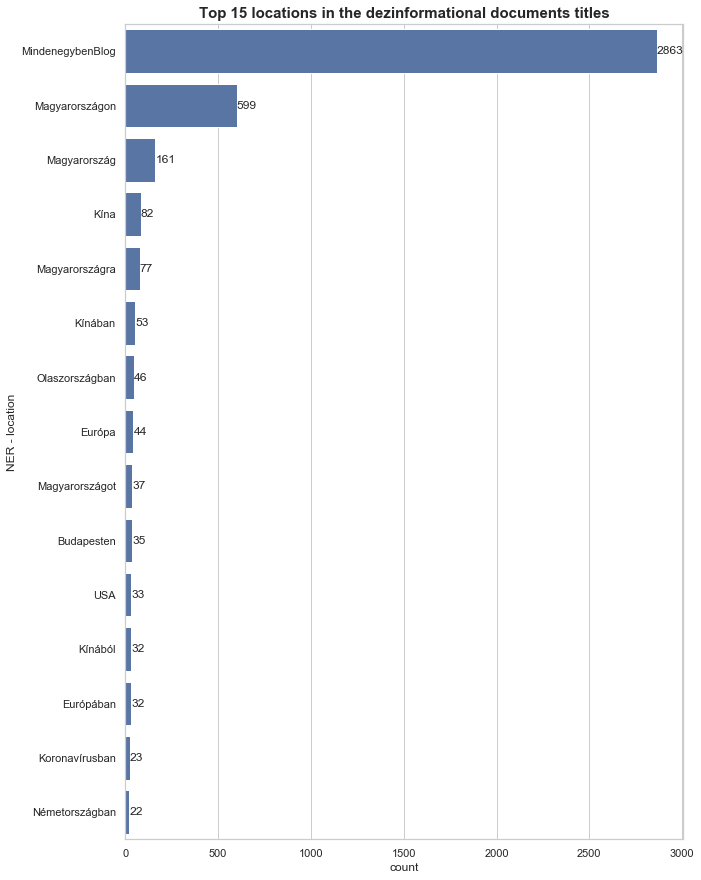

In [55]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="location", data=df_dezinf_top_locs,
            label="person", color="b", order=plot_order)

plt.title('Top 15 locations in the dezinformational documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - location', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

### 4.6 Top Locations in mainstream document title

In [56]:
main_flat_location_list = [item for elem in abt_covid[abt_covid["dezinf"] == 0]["title_ner_locs"] for item in elem]

In [57]:
loc_counts = Counter(main_flat_location_list).most_common(15)
df_main_top_locs = pd.DataFrame(loc_counts, columns =['location', 'count'])

In [58]:
plot_order = df_main_top_locs['location'].values

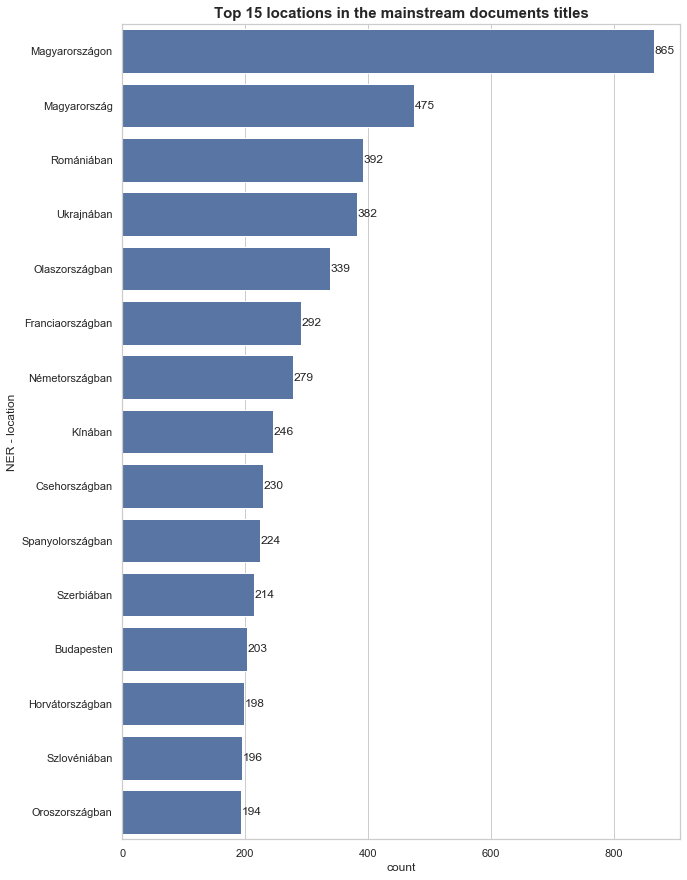

In [59]:
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x="count", y="location", data=df_main_top_locs,
            label="person", color="b", order=plot_order)

plt.title('Top 15 locations in the mainstream documents titles', fontweight='bold', fontsize=15)
plt.xlabel('count', fontsize=12)
plt.ylabel('NER - location', fontsize=12)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 